In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


################################################
## BASICS: CALCULATIONS, FUNCTIONS, VARIABLES  ##
################################################


In [3]:
# Calculator operations
print(3**(6-4))
print(22/7)
print(16**(1/4))


9
3.142857142857143
2.0


In [4]:
# Logical comparisons
print(6*9 == 63)
print(6*9 <= 63)
print(6*9 == 54)


False
True
True


In [5]:
# AND and OR logical comparisons
print((2 > 3) & (3 > 2))
print((2 > 3) | (3 > 2))


False
True


In [6]:
# Other useful functions
print(np.sqrt(2))
print(np.abs(-2))


1.4142135623730951
2


In [7]:
print(np.sin(3.14/2))
print(np.cos(0))

print(np.exp(-1))
print((1 - 1/100)**100)

print(np.log(np.exp(1)))


0.9999996829318346
1.0
0.36787944117144233
0.3660323412732292
1.0


In [8]:
# Assigning values to variables
x = 2**3
y = 6

# Displaying the output
print(x)
print(y)



8
6


########################################
## VECTORS, MATRICES, AND DATA FRAMES  ##
########################################


In [9]:
# Creating a vector of numbers, accessing an index, and summing all of them
z = np.arange(1, 11)
print(z[4])
print(np.sum(z))
double_z = z**2
print(double_z)


5
55
[  1   4   9  16  25  36  49  64  81 100]


In [10]:
# Creating vectors of bike rack locations and capacities
locations = ["Davis", "Porter", "Harvard", "Central", "Kendall"]
capacities = [10, 15, 20, 15, 25]

# Creating a data frame
df1 = pd.DataFrame({'locations': locations, 'capacities': capacities})
print(df1)


  locations  capacities
0     Davis          10
1    Porter          15
2   Harvard          20
3   Central          15
4   Kendall          25


In [11]:
# Adding the capacities of another set of bike rack
capacities2 = [15, 10, 10, 5, 5]

# Creating another data frame
df2 = pd.DataFrame({'locations': locations, 'capacities2': capacities2})
print(df2)


  locations  capacities2
0     Davis           15
1    Porter           10
2   Harvard           10
3   Central            5
4   Kendall            5


In [12]:
# Appending second set of capacities to those of the first data frame using column bind
df_bikes = pd.merge(df1, df2, on='locations')
print(df_bikes)


  locations  capacities  capacities2
0     Davis          10           15
1    Porter          15           10
2   Harvard          20           10
3   Central          15            5
4   Kendall          25            5


In [13]:
# Checking out the class and structure of various variables
print(type(locations))
print(type(capacities))
print(type(df_bikes))
print(df_bikes.dtypes)


<class 'list'>
<class 'list'>
<class 'pandas.core.frame.DataFrame'>
locations      object
capacities      int64
capacities2     int64
dtype: object


In [14]:
# Extracting the column from a data frame
print(df_bikes['locations'])


0      Davis
1     Porter
2    Harvard
3    Central
4    Kendall
Name: locations, dtype: object


In [15]:
# Using the describe function to get summary statistics
print(df_bikes.describe())
print(df_bikes['capacities'].describe())


       capacities  capacities2
count    5.000000       5.0000
mean    17.000000       9.0000
std      5.700877       4.1833
min     10.000000       5.0000
25%     15.000000       5.0000
50%     15.000000      10.0000
75%     20.000000      10.0000
max     25.000000      15.0000
count     5.000000
mean     17.000000
std       5.700877
min      10.000000
25%      15.000000
50%      15.000000
75%      20.000000
max      25.000000
Name: capacities, dtype: float64


In [16]:
# Using the subset function to extract rows of interest from a data frame
bikesKendall = df_bikes[df_bikes['locations'] == "Kendall"]
print(bikesKendall)


  locations  capacities  capacities2
4   Kendall          25            5


In [17]:
# Finding the total bike capacity at Kendall
print(np.sum(bikesKendall['capacities'] + bikesKendall['capacities2']))


30


############################
## WORKING WITH CSV FILES  ##
############################


In [18]:
# Loading csv files using pandas
CEOcomp = pd.read_csv("../data/CEOcomp.csv")


In [19]:
CEOcomp.head()
CEOcomp[CEOcomp['Years'] == 7]

,CompanyNumber,TotalCompensation,Years,ChangeStockPrice,ChangeCompanySales,MBA
0,1,1530,7,48,89,1
10,11,2707,7,44,26,1
15,16,898,7,-21,-20,1
22,23,1550,7,49,-4,1
24,25,1462,7,46,10,1
25,26,1456,7,46,-5,1
28,29,2021,7,48,72,1
32,33,1315,7,42,-7,0
40,41,2253,7,46,104,1


####################################################
## BASIC STATISTICS, PLOTTING, AND SUMMARY TABLES ##
####################################################


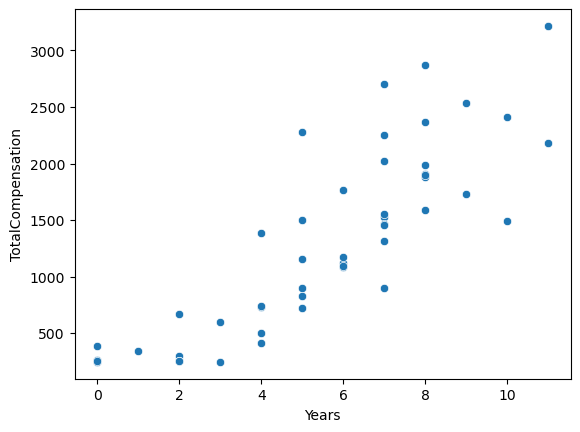

In [20]:
# Plotting compensation versus years of experience
sns.scatterplot(data=CEOcomp, x='Years', y='TotalCompensation')
plt.show()


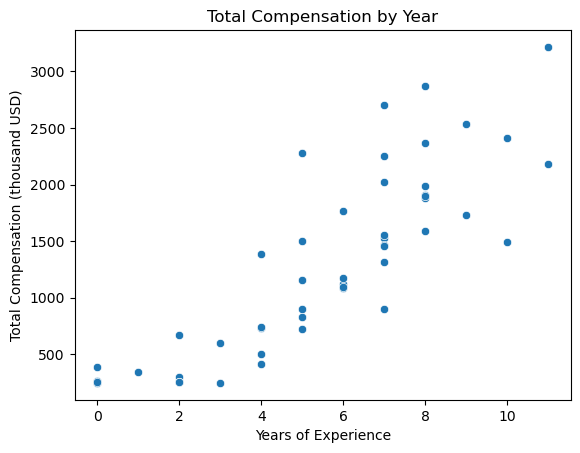

In [21]:
# Plotting with a title, x- and y-axis labels
sns.scatterplot(data=CEOcomp, x='Years', y='TotalCompensation')
plt.title('Total Compensation by Year')
plt.xlabel('Years of Experience')
plt.ylabel('Total Compensation (thousand USD)')
plt.show()


In [22]:
CEOcomp.head()

,CompanyNumber,TotalCompensation,Years,ChangeStockPrice,ChangeCompanySales,MBA
0,1,1530,7,48,89,1
1,2,1117,6,35,19,1
2,3,602,3,9,24,0
3,4,1170,6,37,8,1
4,5,1086,6,34,28,0


In [23]:
# Creating a table to summarize the data
print(CEOcomp.groupby('MBA')['TotalCompensation'].mean())


MBA
0     723.294118
1    1588.212121
Name: TotalCompensation, dtype: float64


In [24]:
# Creating a table to look at counts
print(pd.crosstab(CEOcomp['Years'], CEOcomp['MBA']))


MBA    0  1
Years      
0      3  2
1      1  0
2      3  1
3      2  0
4      2  3
5      1  5
6      2  3
7      1  8
8      1  6
9      0  2
10     1  1
11     0  2
